# TFBS from motifs

In this notebook, we show how a CombObj can be set up using motifs and a set of target regions.

## Setup a CombObj

In [1]:
from tfcomb import CombObj
C = CombObj()

## Search for TFBS within peak regions

We are using a subset of ATAC-seq peaks from GM12878 as the target regions. The .TFBS variable can then be filled as seen here:

In [2]:
C.TFBS_from_motifs(regions="../data/GM12878_hg38_chr4_ATAC_peaks.bed", 
                   motifs="../data/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="../data/hg38_chr4.fa.gz", 
                   threads=4)

INFO: Scanning for TFBS with 4 thread(s)...
INFO: Progress: 11%
INFO: Progress: 20%
INFO: Progress: 30%
INFO: Progress: 41%
INFO: Progress: 50%
INFO: Progress: 60%
INFO: Progress: 70%
INFO: Progress: 81%
INFO: Progress: 90%
INFO: Finished!
INFO: Processing scanned TFBS
INFO: Identified 165810 TFBS (401 unique names) within given regions


In [3]:
C.TFBS[:10]

[chr4	11750	11772	THAP1	10.09272	+,
 chr4	11806	11823	CTCFL	12.12093	-,
 chr4	11806	11825	CTCF	13.68703	-,
 chr4	11864	11881	CTCFL	12.23068	-,
 chr4	11864	11883	CTCF	12.56734	-,
 chr4	11938	11945	MYF6	8.75866	-,
 chr4	11997	12010	MYOG	9.91354	-,
 chr4	11999	12009	TCF12	9.23823	+,
 chr4	11999	12009	TCF4	9.99356	+,
 chr4	12000	12007	MYF6	8.75866	-]

## Perform market basket analysis

As shown in previous notebooks, we can now perform the market basket analysis on the sites within .TFBS:

In [4]:
C.market_basket(threads=10)

Internal counts for 'TF_counts' were not set. Please run .count_within() to obtain TF-TF co-occurrence counts.
INFO: Setting up binding sites for counting
INFO: Counting co-occurrences within sites
INFO: Counting co-occurrence within background
INFO: Progress: 14%
INFO: Progress: 28%
INFO: Progress: 40%
INFO: Progress: 52%
INFO: Progress: 64%
INFO: Progress: 76%
INFO: Progress: 88%
INFO: Finished!
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs
INFO: Market basket analysis is done! Results are found in <CombObj>.rules


In [5]:
C

<CombObj: 165810 TFBS (401 unique names) | Market basket analysis: 126997 rules>

In [6]:
C.rules.head()

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
POU3F2-SMARCA5,POU3F2,SMARCA5,239,302,241,0.885902,129.586528
SMARCA5-POU3F2,SMARCA5,POU3F2,239,241,302,0.885902,129.586528
POU2F1-SMARCA5,POU2F1,SMARCA5,263,426,241,0.820810,135.355691
SMARCA5-POU2F1,SMARCA5,POU2F1,263,241,426,0.820810,135.355691
SMARCA5-ZNF582,SMARCA5,ZNF582,172,241,195,0.793419,117.370387


## Visualize rules

With the market basket analysis done, we have the option to visualize the identified co-occurring TFs:

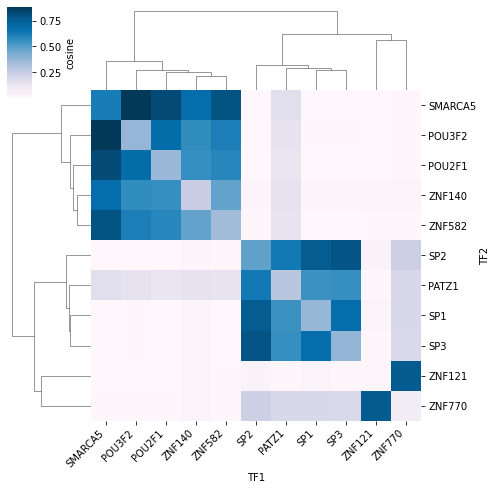

In [7]:
_ = C.plot_heatmap()

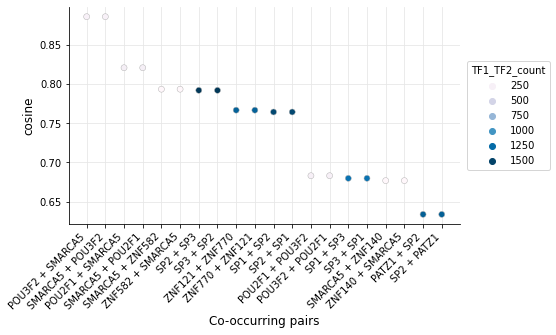

In [8]:
_ = C.plot_bubble()

## The effect of count parameters

In this example, the first rules contain more _TF1_TF2_counts_ than the individual counts of TF1 and TF2:

In [9]:
C.rules.head(1)

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
POU3F2-SMARCA5,POU3F2,SMARCA5,239,302,241,0.885902,129.586528


How can that be? If there are multiple combinations of TF1-TF2 within the same window, these combinations can add up to more than the number of individual TF positions. This effect can be controlled by setting `binarize=True` in _count_within_. This will ensure that each co-occurrence is only counted once per window:

In [10]:
C.count_within(binarize=True, threads=8)
C.market_basket()

INFO: Counting co-occurrences within sites
INFO: Counting co-occurrence within background
INFO: Progress: 16%
INFO: Progress: 28%
INFO: Progress: 32%
INFO: Progress: 44%
INFO: Progress: 54%
INFO: Progress: 64%
INFO: Progress: 72%
INFO: Progress: 80%
INFO: Progress: 92%
INFO: Finished!
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs
INFO: Market basket analysis is done! Results are found in <CombObj>.rules


In [11]:
C.rules.head()

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
ZNF121-ZNF770,ZNF121,ZNF770,1249,1242,2394,0.724335,103.405506
ZNF770-ZNF121,ZNF770,ZNF121,1249,2394,1242,0.724335,103.405506
PAX5-ZNF770,PAX5,ZNF770,863,968,2394,0.566906,82.606752
ZNF770-PAX5,ZNF770,PAX5,863,2394,968,0.566906,82.606752
SP1-SP2,SP1,SP2,570,1718,2150,0.296581,35.851669


It is also possible to play around with the maximum overlap allowed. The default is no overlap allowed, but setting _max_overlap_ to 1 (all overlaps allowed), highlights some of the TFs which are highly overlapping: 

In [12]:
C.count_within(binarize=True, max_overlap=1, threads=8)
C.market_basket()

INFO: Counting co-occurrences within sites
INFO: Counting co-occurrence within background
INFO: Progress: 12%
INFO: Progress: 24%
INFO: Progress: 32%
INFO: Progress: 46%
INFO: Progress: 58%
INFO: Progress: 64%
INFO: Progress: 78%
INFO: Progress: 80%
INFO: Progress: 90%
INFO: Finished!
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs
INFO: Market basket analysis is done! Results are found in <CombObj>.rules


In [13]:
C.rules.head()

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
ARNT-EPAS1,ARNT,EPAS1,18,18,18,1.000000,128.428571
EPAS1-ARNT,EPAS1,ARNT,18,18,18,1.000000,128.428571
NR4A1-NR4A2,NR4A1,NR4A2,141,141,141,1.000000,127.000000
NR4A2-NR4A1,NR4A2,NR4A1,141,141,141,1.000000,127.000000
MITF-TFE3,MITF,TFE3,82,92,87,0.916559,116.772609
